# What i have learnt

- Split dataset into training and test set using model_selection.train_test_split()
- Visualize all variables using scatter_matrix
- Explore distribution of classes using df.groupby(by='class').size()
- Building models and compare their result average and std --> choose the best model
- Harness learning with 10 fold cross validation using model_selection.KFold(n_splits=10, random_state=seed)
- Measure the accuracy of model prediction outcome using metrics.accuracy_score. Also by using classifiication_report and confusion_matrix
- Apply model into predicting future observation

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# The Iris dataset:

- This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

- Predicted attribute: class of iris plant.

- This is an exceedingly simple domain.

# Get the data

- Download the data from https://en.wikipedia.org/wiki/Iris_flower_data_set
- As the data file has no header row, we can pass in names in header list
- Use df.read_csv to load data into pandas DataFrame
- Explore the data using head, tail and check for null value

In [3]:
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', names=header)

### The data frame has 150 rows and 5 columns

In [122]:
df.shape

(150, 5)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Class distribution equally between 3 types ~ 33% for each of 3 classes

In [121]:
print(df.groupby(by='class').size(), '\n')
print(df['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64 

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64


### Summary statistics

In [120]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Missing attribute value: None

In [117]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# Plotting data

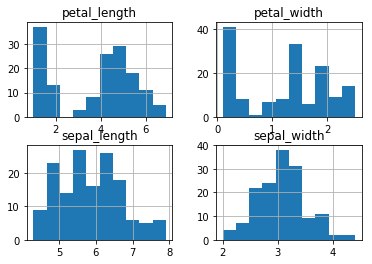

In [12]:
df.hist()
plt.show()

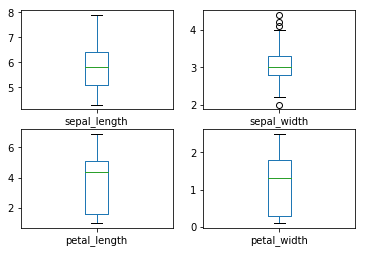

In [42]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Multivariate Plots

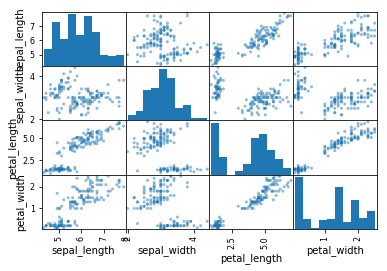

In [14]:
scatter_matrix(df)
plt.show()

# Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

    Separate out a validation dataset.
    Set-up the test harness to use 10-fold cross validation.
    Build 5 different models to predict species from flower measurements
    Select the best model.

### Create a validation dataset

In [47]:
# Create an X array of 4 predictors and Y array of class
array = df.values
X = array[:, 0:4]
Y = array[:, 4]

# Using 80% data as train data, the rest 20% as test set
validation_size = 0.2
seed = 7

# Split dataset into training and validation sets
(X_train, 
 X_validation, 
 Y_train, 
 Y_validation) = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Test harness

We use 10 fold crossvalidation to estimate accuracy

In [21]:
seed = 7
scoring = 'accuracy'

### Building models

We will run test on 6 different algorithms


    Logistic Regression (LR)
    Linear Discriminant Analysis (LDA)
    K-Nearest Neighbors (KNN).
    Classification and Regression Trees (CART).
    Gaussian Naive Bayes (NB).
    Support Vector Machines (SVM).


In [48]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_result = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_result.mean(), cv_result.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


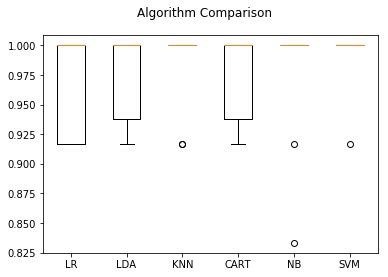

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Make prediction

Using KNN algorithms

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



### Make prediction

Using Support Vector Machine

In [53]:
model = SVC()
model.fit(X_train, Y_train)
prediction_svc = model.predict(X_validation)
accu = accuracy_score(Y_validation, prediction_svc)
print('accuracy is %a' % accu)

accuracy is 0.93333333333333335


# Usage of model

In future, when we find an iris plant, we can measure its size of sepal and petal and make classification based on our model with over 93% correct result.

For example, a plant have [5.2, 3.6, 1.2, 0.3] in size, using our model we can have answer like this.

The SVC model predicts this plant is Iris-setosa

In [95]:
# Reshape array to correct the shape (1, 4) with 1 observation and 4 columns

new_plant = np.asarray([5.2, 3.6, 1.2, 0.3])
new_plant = new_plant.reshape(1, -1)
new_plant.shape

(1, 4)

In [113]:
predict_new = model.predict(new_plant)
print(predict_new)

['Iris-setosa']
